<a href="https://colab.research.google.com/github/vaibhav-prasad707/SentimentAnalysis_MentalHealth/blob/main/MentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-jiiawzvl
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-jiiawzvl
  Resolved https://github.com/tweepy/tweepy.git to commit 703f08cff6c1e9dac59e800c784fdb61c0220fe2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tweepy: filename=tweepy-4.15.0-py3-none-any.whl size=98745 sha256=54a43dcac3ea83568d3bcac23e49fb1933c18e78b34b06caeba16c0b3f50dc9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-0nbgag64/wheels/dc/75/73/ac2b7c1ac66d801a0b03c7707a2fc16e8689f792b585994c6f
Successfully built tweepy
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.14.0
    Uninstalling tweepy-4.14.0:
      Successfully uninstalled tweepy-4.14.0


In [3]:
import tweepy

# Authenticate
client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAAaiyAEAAAAA0yLX0ul3VyJQ54bGBSuL5cgTuBA%3D8DvZozE6vWnpwykc6vPU8j1bhqZzlvOlM1SYBGJcLcXyHVR2Da")

# Fetch tweets
query = "mental health -is:retweet lang:en"
response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'text'])

tweets = [tweet.text for tweet in response.data]


In [4]:
import re

def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)    # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)    # Remove hashtags
    tweet = re.sub(r'\W', ' ', tweet)     # Remove special characters
    tweet = tweet.lower()                 # Convert to lowercase
    return tweet

cleaned_tweets = [preprocess_tweet(tweet) for tweet in tweets]


In [5]:
from textblob import TextBlob

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

sentiments = [analyze_sentiment(tweet) for tweet in cleaned_tweets]


<ipython-input-6-613988b0b42e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


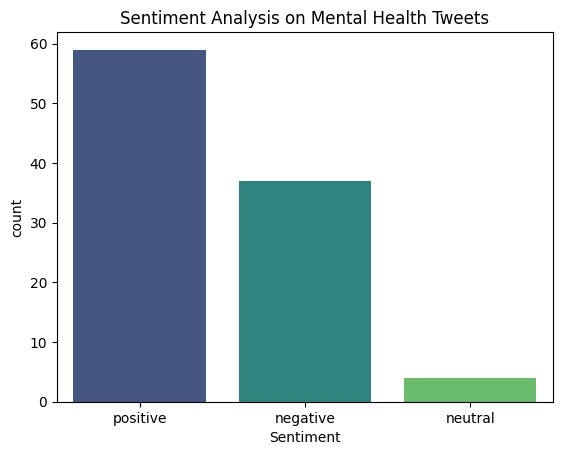

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Tweet': cleaned_tweets, 'Sentiment': sentiments})

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Analysis on Mental Health Tweets')
plt.show()
